<a href="https://colab.research.google.com/github/priyansh21112002/Melbourne-House-Prices-Predicition/blob/main/Melbourne_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

data=pd.read_csv("/content/melb_data.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# **Describing the dataset**

In [2]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [3]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [4]:
data.shape

(13580, 21)

In [5]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
data.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


## **Dropping irrelevant columns**

In [9]:
data=data.drop(['Postcode','Type','Method','SellerG','Date','CouncilArea','Address','Propertycount'],axis=1)
data.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname
0,Abbotsford,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,Northern Metropolitan
1,Abbotsford,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan
2,Abbotsford,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan
3,Abbotsford,3,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,Northern Metropolitan
4,Abbotsford,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan


In [10]:
data.shape

(13580, 13)

In [11]:
data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350


In [12]:
data.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
Rooms,1.000000,0.496634,0.294203,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771
Price,0.496634,1.000000,-0.162522,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656
Distance,0.294203,-0.162522,1.000000,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425
Bedroom2,0.944190,0.475951,0.295927,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238
Bathroom,0.592934,0.467038,0.127155,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971
Car,0.408483,0.238979,0.262994,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395
Landsize,0.025678,0.037507,0.025004,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833
BuildingArea,0.124127,0.090981,0.099481,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810
YearBuilt,-0.065413,-0.323617,0.246379,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470
Lattitude,0.015948,-0.212934,-0.130723,0.015925,-0.070594,-0.001963,0.009695,0.043420,0.060445,1.000000,-0.357634


# **Performing Basic Functions**

In [13]:
data.iloc[1:7]

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname
1,Abbotsford,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan
2,Abbotsford,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan
3,Abbotsford,3,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,Northern Metropolitan
4,Abbotsford,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan
5,Abbotsford,2,941000.0,2.5,2.0,1.0,0.0,181.0,NaN,NaN,-37.8041,144.9953,Northern Metropolitan
6,Abbotsford,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,Northern Metropolitan


In [14]:
data.isnull().sum()

Suburb             0
Rooms              0
Price              0
Distance           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
Lattitude          0
Longtitude         0
Regionname         0
dtype: int64

In [15]:
data['Car']=data['Car'].fillna(0)
data['Car'].isnull().sum()

0

In [16]:
data['BuildingArea']=data['BuildingArea'].fillna(data['BuildingArea'].mean())
data['BuildingArea'].isnull().sum()

0

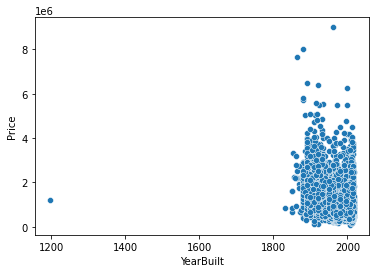

In [17]:
#use plotting to see trend of price with year built to fill values of year built
sns.scatterplot(x=data['YearBuilt'],y=data['Price'])

In [18]:
data['YearBuilt']=data['YearBuilt'].fillna(data['YearBuilt'].mean())
data['YearBuilt'].isnull().sum()

0

# **Few Statistical Functions**

In [19]:
data['Landsize'].max()

433014.0

In [20]:
data['Landsize'].argmax()

11020

In [21]:
data['Landsize'].idxmax()

11020

In [22]:
data['Landsize'].quantile()

440.0

In [23]:
data['Price'].sum()

14607789799.0

In [24]:
data['Price'].mean()

1075684.079455081

In [25]:
data['Price'].median()

903000.0

In [26]:
data['Price'].mad()

462213.6702424136

In [27]:
data['Price'].var()

408718202199.9009

In [28]:
data['Price'].skew()

2.239624312529873

In [29]:
data['Price'].kurt()

9.87433888590604

In [30]:
data['Price'].pct_change()

0             NaN
1       -0.300676
2        0.415459
3       -0.419795
4        0.882353
           ...   
13575    1.139175
13576   -0.171888
13577    0.134821
13578    1.136752
13579   -0.486000
Name: Price, Length: 13580, dtype: float64

In [31]:
data['Car'].cumsum()

0            1.0
1            1.0
2            1.0
3            2.0
4            4.0
          ...   
13575    21753.0
13576    21755.0
13577    21759.0
13578    21764.0
13579    21765.0
Name: Car, Length: 13580, dtype: float64

# **Data Visualization**

Text(0, 0.5, 'Price')

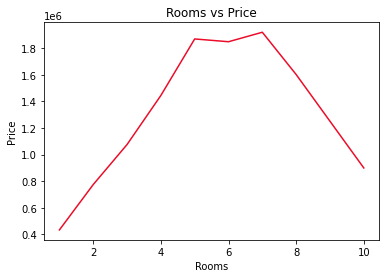

In [32]:
x=data.groupby('Rooms').mean()['Price']
y=x.plot(color='#eb0c29')
y.set_title('Rooms vs Price')
y.set_xlabel('Rooms')
y.set_ylabel('Price')

Text(0, 0.5, 'Price')

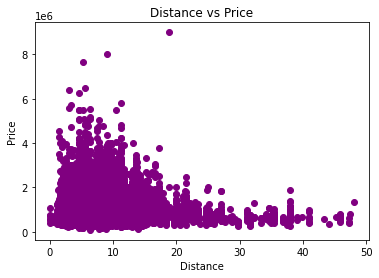

In [33]:
plt.scatter(data['Distance'],data['Price'],color='purple')
plt.title('Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

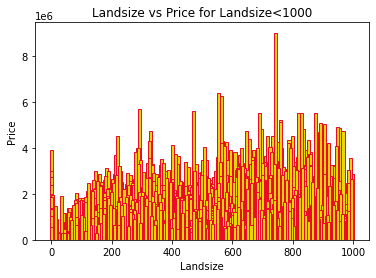

In [34]:
x=data[data['Landsize']<1000]
plt.bar(x['Landsize'],x['Price'],width=10,color='#ebd40c',edgecolor='#eb0c29')
plt.title('Landsize vs Price for Landsize<1000')
plt.xlabel('Landsize')
plt.ylabel('Price')


Text(0.5, 1.0, 'Average cost of different Regions')

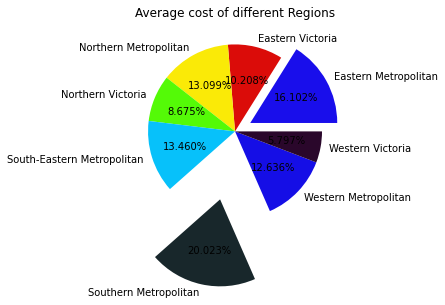

In [35]:
x=pd.DataFrame(data.groupby(['Regionname']).mean()['Price'])
plt.pie(x['Price'],labels=x.index,autopct='%1.3f%%',explode=(0.2,0,0,0,0,0.8,0,0),colors=('#190eeb','#db0c09','#faea07','#54fa07','#07c1fa','#18272b','#150ee6','#2a072b','#040f36'));
plt.title('Average cost of different Regions')


In [36]:
from mpl_toolkits.mplot3d import Axes3D

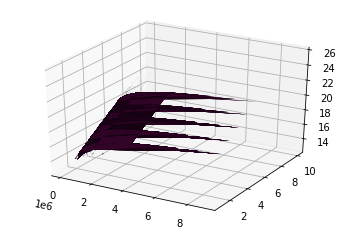

In [37]:
a = np.array(data['Price'])
b = np.array(data['Rooms'])
a,b = np.meshgrid(a, b)
fig = plt.figure()
axes = fig.gca(projection ='3d')
axes.plot_surface(a, b, np.log(a)+b,color='#36042d')

Text(0.5, 1.0, 'Price vs Bedroom2')

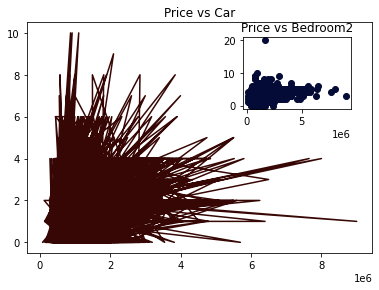

In [38]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
inner_ax = fig.add_axes([0.6,0.6,0.25,0.25])
ax.plot(data['Price'],data['Car'],color='#360704')
ax.set_title('Price vs Car')
inner_ax.scatter(data['Price'],data['Bedroom2'],color='#040b36')
inner_ax.set_title('Price vs Bedroom2')

# **Data Aggregation**

In [39]:
data.groupby('Regionname').mean().round(decimals=2)['Price']

Regionname
Eastern Metropolitan          1104079.63
Eastern Victoria               699980.79
Northern Metropolitan          898171.08
Northern Victoria              594829.27
South-Eastern Metropolitan     922943.78
Southern Metropolitan         1372963.37
Western Metropolitan           866420.52
Western Victoria               397523.44
Name: Price, dtype: float64

In [40]:
data.groupby('YearBuilt').mean().round(decimals=2)['Price']

YearBuilt
1196.0    1200000.00
1830.0     855000.00
1850.0    1179500.00
1854.0    3310000.00
1856.0    2260000.00
             ...    
2014.0     921915.00
2015.0    1231484.62
2016.0    1523655.17
2017.0    1037972.28
2018.0    1310000.00
Name: Price, Length: 145, dtype: float64

In [41]:
data.groupby('Suburb').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Suburb,,,,,,,,
Abbotsford,56.0,1.060366e+06,361279.965616,300000.0,866250.0,1093500.0,1311250.0,1876000.0
Aberfeldie,44.0,1.277455e+06,709210.417641,280000.0,751500.0,1300000.0,1657500.0,3900000.0
Airport West,67.0,7.566567e+05,170008.849643,440000.0,666000.0,755000.0,858000.0,1250000.0
Albanvale,6.0,5.370833e+05,78723.831631,415000.0,511125.0,540750.0,562500.0,655000.0
Albert Park,69.0,1.941355e+06,732435.924227,442500.0,1500000.0,1900000.0,2155000.0,4735000.0
...,...,...,...,...,...,...,...,...
Wonga Park,1.0,9.000000e+05,NaN,900000.0,900000.0,900000.0,900000.0,900000.0
Wyndham Vale,4.0,4.832500e+05,11354.147554,475000.0,477250.0,479000.0,485000.0,500000.0
Yallambie,24.0,8.396875e+05,213571.839685,602500.0,720750.0,773000.0,920250.0,1670000.0


In [42]:
data.groupby(['Rooms','Car']).std().round(decimals=2)['Price']

Rooms  Car 
1      0.0      343540.28
       1.0      184568.13
       2.0      131390.47
       3.0            NaN
       4.0      371882.15
2      0.0      324479.90
       1.0      307483.23
       2.0      408157.25
       3.0      421299.59
       4.0      507756.41
       5.0      194454.36
       6.0      605149.77
3      0.0      474542.37
       1.0      487947.90
       2.0      493123.31
       3.0      565941.88
       4.0      579683.75
       5.0      618499.28
       6.0      603379.65
       7.0     1725340.55
       8.0      386380.10
       9.0            NaN
       10.0           NaN
4      0.0      788264.29
       1.0      664366.47
       2.0      728560.26
       3.0      801078.32
       4.0      878282.36
       5.0     1106230.25
       6.0     1053937.08
       7.0      880720.01
       8.0     1093419.77
       10.0     132228.97
5      0.0      590373.86
       1.0      951820.40
       2.0      855772.53
       3.0     1118242.03
       4.0     1423638.30


In [43]:
data.groupby('Regionname').agg({'Landsize':['median','mean'],'BuildingArea':['mean','std']})

Landsize              BuildingArea             
                             median         mean         mean          std
Regionname                                                                
Eastern Metropolitan          649.0   634.133923   164.515586   183.306469
Eastern Victoria              796.0  2949.698113   169.898225    82.895442
Northern Metropolitan         326.0   568.948072   136.986808    76.012041
Northern Victoria             724.0  3355.463415  1240.830718  6927.402717
South-Eastern Metropolitan    604.0   613.991111   157.231344    57.318742
Southern Metropolitan         361.0   509.252183   152.798531    85.996599
Western Metropolitan          452.0   493.606852   148.004647    54.645574
Western Victoria              599.5   655.500000   140.625130    47.441983

# **Creating a Model**

In [44]:
y=data['Price']
x=data[['Rooms', 'Bathroom', 'Landsize', 'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude']]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=2)
mdl=RandomForestRegressor(n_estimators=150)
mdl.fit(x_train,y_train)
predictions=mdl.predict(x_test)

In [46]:
mdl.fit(x_train,y_train)
predictions=mdl.predict(x_test)
mean_absolute_error(y_test,predictions)

180162.2958281787